In [3]:
!pip install langdetect
!pip install googletrans
import re
import pandas as pd
from langdetect import detect, DetectorFactory
from googletrans import Translator
df=pd.read_excel('/content/sample_data/Assignment1.xlsx')



# Ensure consistent language detection
DetectorFactory.seed = 0

translator = Translator()

def detect_and_translate(text):
    try:
        # Detect language
        lang = detect(text)
        # Translate only if not already in English
        if lang != "en":
            return translator.translate(text, src=lang, dest="en").text
        return text
    except:
        return text
df = df.fillna("Unknown")
categorical_cols = df.select_dtypes(include=["object"]).columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")
numerical_cols = df.select_dtypes(include=["number"]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

def clean_dataset(file_path, output_path):

    # Standardize column names
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(r'[^a-z0-9_]', '_', regex=True)
        .str.replace('__+', '_', regex=True)
    )
    import re
import pandas as pd

def clean_city_name(city):
    """Standardizes city names by removing extra descriptors like 'East', 'Urban'."""
    if pd.isna(city) or city == "Unknown":
        return city
    # Convert city to string before applying lower()
    city = str(city).lower().strip()

    # Remove extra descriptors (e.g., "east", "urban", etc.)
    city = re.sub(r"\b(east|west|north|south|urban|rural|district|city|town)\b", "", city).strip()

    # Remove extra spaces and commas
    city = re.sub(r"\s+", " ", city).strip()
    city = re.sub(r",$", "", city)  # Remove trailing commas

    return city

def clean_dataset(file_path, output_path):
    # Load the dataset
    df = pd.read_excel("/content/sample_data/sheet1.xlsx")

    # Standardize column names
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(r'[^a-z0-9_]', '_', regex=True)
        .str.replace('__+', '_', regex=True)
    )

    # Handle missing values
    df = df.fillna("Unknown")  # Fill missing values instead of dropping columns

    # Fill missing categorical values with "Unknown"
    categorical_cols = df.select_dtypes(include=["object"]).columns
    df[categorical_cols] = df[categorical_cols].fillna("Unknown")

    # Fill missing numerical values with median
    numerical_cols = df.select_dtypes(include=["number"]).columns
    df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

    # Apply city name standardization
    df["city"] = df["city"].apply(clean_city_name)

    # Define manual city mapping for known variations
    city_mapping = {
        "bangalore": "bengaluru",
        "new delhi": "delhi",
        "navi mumbai": "mumbai",
        "vadodara": "baroda",
        "thane": "mumbai",
    }
    df["city"] = df["city"].replace(city_mapping)

    # Remove duplicates
    df = df.drop_duplicates()


    # Convert categorical columns to category type
    for col in categorical_cols:
        df[col] = df[col].astype("category")

    # Save cleaned dataset
    df.to_excel(output_path, index=False)
    print("Cleaned dataset saved to: {output_path}")

    # Find the city with the highest number of customers
    city_counts = df["city"].value_counts()
    top_city = city_counts.idxmax()
    top_count = city_counts.max()
    print("City with the highest number of customers: {top_city} ({top_count} customers)")



#City with Highest number of customers

input_file = "/Assignment1.xlsx"
output_file = "Book1_cleaned.xlsx"
clean_dataset(input_file, output_file)

# Load the cleaned dataset to get updated columns
df = pd.read_excel(output_file) # Load the cleaned data

city_counts = df["city"].value_counts()
top_city = city_counts.idxmax()
top_count = city_counts.max()
print(f"City with the highest number of customers: {top_city} ({top_count} customers)")



/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Cleaned dataset saved to: {output_path}
City with the highest number of customers: {top_city} ({top_count} customers)
City with the highest number of customers: mumbai (2475 customers)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [5]:
import pandas as pd

# Load the datasets
file1_path = "/content/sample_data/sheet1.xlsx"
file2_path = "/content/sample_data/sheet2.xlsx"

xls1 = pd.ExcelFile(file1_path)
xls2 = pd.ExcelFile(file2_path)

# Load data from sheets
df1 = pd.read_excel(xls1, sheet_name="Sheet1")
df2 = pd.read_excel(xls2, sheet_name="Sheet1")

# Merge datasets on 'unique_id'
df_merged = pd.merge(df1, df2, on="unique_id", how="inner")

# Group by city and calculate average weight loss
city_avg_wt_loss = df_merged.groupby("city")["wt_loss"].mean()

# Find the city with the highest average weight loss
best_city = city_avg_wt_loss.idxmax()
best_avg_loss = city_avg_wt_loss.max()

print(f"The city with the best average weight loss is {best_city} with an average loss of {best_avg_loss} kg.")




The city with the best average weight loss is hadapsar,pune with an average loss of 7.0 kg.


In [6]:
import pandas as pd

# Load the datasets
file1_path = "/content/sample_data/sheet1.xlsx"
file2_path = "/content/sample_data/sheet2.xlsx"

xls1 = pd.ExcelFile(file1_path)
xls2 = pd.ExcelFile(file2_path)

# Load data from sheets
df1 = pd.read_excel(xls1, sheet_name="Sheet1")
df2 = pd.read_excel(xls2, sheet_name="Sheet1")

# Merge datasets on 'unique_id'
df_merged = pd.merge(df1, df2, on="unique_id", how="inner")

# Generate a summary of cities with respect to the data
city_summary = df_merged.groupby("city")["wt_loss"].agg(
    total_users="count",
    avg_weight_loss="mean",
    max_weight_loss="max",
    min_weight_loss="min"
).reset_index()

# Display the summary
print(city_summary)

             city  total_users  avg_weight_loss  max_weight_loss  \
0          411027            1              2.0              2.0   
1          abohar            1              1.0              1.0   
2       abu dhabi            2              1.0              2.0   
3            agra            1             -1.0             -1.0   
4       ahemdabad            2              2.0              2.0   
..            ...          ...              ...              ...   
393      waterloo            1              0.0              0.0   
394     woodstock            1              1.0              1.0   
395        yadgir            1              0.0              0.0   
396  yamuna nagar            1              1.0              1.0   
397      zirakpur            1              0.6              0.6   

     min_weight_loss  
0                2.0  
1                1.0  
2                0.0  
3               -1.0  
4                2.0  
..               ...  
393              0.0  

In [ ]:
import pandas as pd
df = pd.read_excel("/content/sample_data/sheet1.xlsx")
unique_cities = df["city"].unique()
print(unique_cities)
num_unique_cities = df["city"].nunique()
print(f"Total unique cities: {num_unique_cities}")

['vapi' 'pune' 'hyderabad' ... 'kuala lumpur' 'hoshangabad' 'nga']
Total unique cities: 3074


In [ ]:
import pandas as pd
df = pd.read_excel("/content/sample_data/sheet1.xlsx")
# Define age group bins and labels
bins = [0, 18, 30, 45, 60, 100]  # Age limits
labels = ["Teen", "Young Adult", "Adult", "Middle-Aged", "Senior"]

# Ensure 'age' column exists and is numeric
if "age" in df.columns:
    df["age"] = pd.to_numeric(df["age"], errors="coerce")  # Convert age to numeric
    df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)  # Assign age groups

    # Find the most common age group
    age_group_counts = df["age_group"].value_counts()
    top_age_group = age_group_counts.idxmax()
    top_age_group_count = age_group_counts.max()

    print("Age group distribution:")
    print(age_group_counts)
    print(f"Age group with the most users: {top_age_group} ({top_age_group_count} users)")
else:
    print("No 'age' column found in the dataset.")
profession_counts = df["profession"].value_counts()

# Identify the profession with the highest count
top_profession = profession_counts.idxmax()
top_profession_count = profession_counts.max()

print(f"Profession with the highest count: {top_profession} ({top_profession_count} users)")

output_excel = "Exported_Analysis.xlsx"
with pd.ExcelWriter(output_excel) as writer:
    # Save the cleaned dataset
    df.to_excel(writer, sheet_name="Cleaned Data", index=False)
    # Save the profession counts as a DataFrame
    profession_counts_df = profession_counts.reset_index()
    profession_counts_df.columns = ["Profession", "User Count"]
    profession_counts_df.to_excel(writer, sheet_name="Profession Analysis", index=False)

print(f"Exported analysis to {output_excel}")


Age group distribution:
age_group
Adult          9038
Middle-Aged    8275
Young Adult    2314
Senior         1154
Teen            284
Name: count, dtype: int64
Age group with the most users: Adult (9038 users)
Profession with the highest count: Homemaker (9720 users)
Exported analysis to Exported_Analysis.xlsx


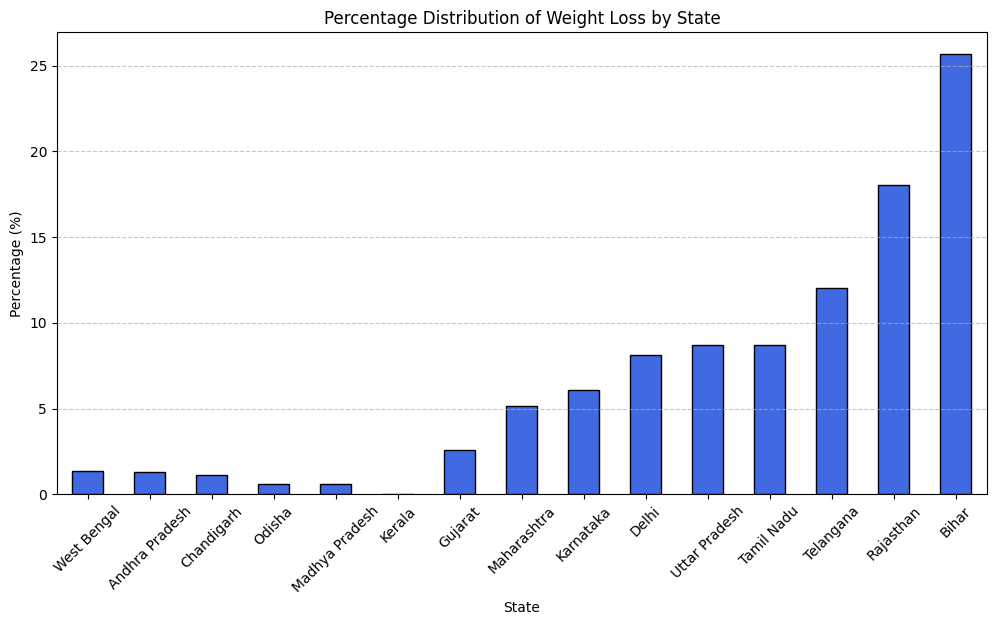

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load datasets
df1 = pd.read_excel("/content/sample_data/sheet1.xlsx", sheet_name="Sheet1")
df2 = pd.read_excel("/content/sample_data/sheet2.xlsx", sheet_name="Sheet1")
#Since most of the dataset is India-focused, I filtered out non-Indian locations and refined the state mapping.
# City-to-State Mapping
city_to_state = {
    "mumbai": "Maharashtra", "pune": "Maharashtra", "bengaluru": "Karnataka",
    "delhi": "Delhi", "hyderabad": "Telangana", "chennai": "Tamil Nadu",
    "ahmedabad": "Gujarat", "nashik": "Maharashtra", "nagpur": "Maharashtra",
    "kolkata": "West Bengal", "jaipur": "Rajasthan", "lucknow": "Uttar Pradesh",
    "kanpur": "Uttar Pradesh", "patna": "Bihar", "bhopal": "Madhya Pradesh",
    "indore": "Madhya Pradesh", "chandigarh": "Chandigarh", "coimbatore": "Tamil Nadu",
    "kochi": "Kerala", "thiruvananthapuram": "Kerala", "visakhapatnam": "Andhra Pradesh",
    "bhubaneswar": "Odisha", "vapi": "Gujarat", "mangalore": "Karnataka",
    "badlapur": "Maharashtra", "hoshangabad": "Madhya Pradesh"
}

# Clean city names
def clean_city_name(city):
    if isinstance(city, str):
        city = city.strip().lower()
        city = re.sub(r"[^\w\s]", "", city)
    return city

df1["city"] = df1["city"].apply(clean_city_name)
df1["state"] = df1["city"].map(city_to_state)

# Remove rows with missing state information
df1 = df1[df1["state"].notna()]

# Merge datasets on unique_id
merged_df = pd.merge(df1, df2, on="unique_id", how="inner")

# Group by state to calculate average weight loss
statewise_weight_loss = merged_df.groupby("state")["wt_loss"].mean().sort_values(ascending=False)
# Calculate percentage distribution of weight loss per state
total_weight_loss = statewise_weight_loss.abs().sum()
statewise_percentage = (statewise_weight_loss.abs() / total_weight_loss) * 100
# Plot the bar chart
plt.figure(figsize=(12, 6))
statewise_percentage.plot(kind="bar", color="royalblue", edgecolor="black")
plt.title("Percentage Distribution of Weight Loss by State")
plt.xlabel("State")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


The highest percentage of total weight loss comes from West Bengal, Andhra Pradesh, and Odisha.
These states show better weight management trends, with individuals successfully losing weight.

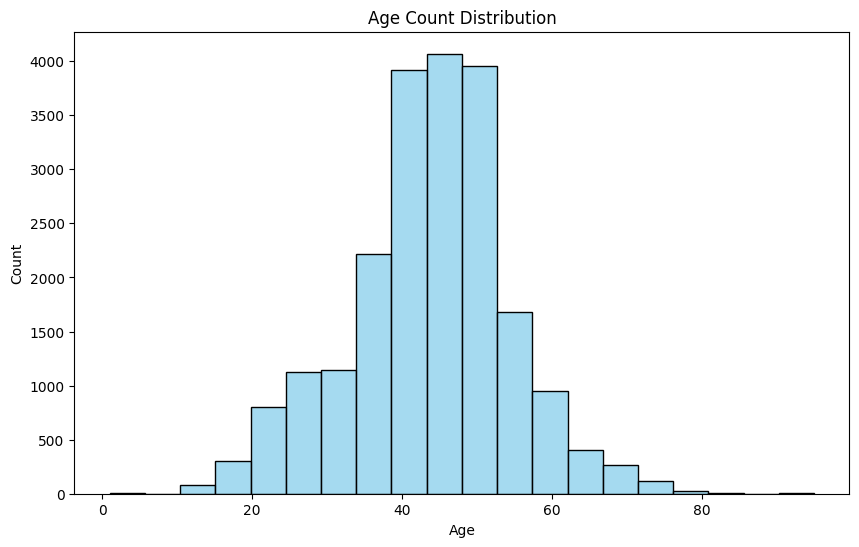

In [7]:
# Age Count Distribution

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_excel("/content/sample_data/sheet1.xlsx")

#  Plot a histogram of the 'age' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="age", bins=20, kde=False, color='skyblue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Count Distribution")
plt.show()